# Decision Trees

Decision Trees make very few assumptions about the training data (as opposed to linear  models,  which  obviously  assume  that  the  data  is  linear,  for  example).  If  left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely,  and  most  likely  overfitting  it.

To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called **regularization**. The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the  maximum  depth  of  the  Decision  Tree.  In  Scikit-Learn,  this  is  controlled  by  the
max_depth   hyperparameter  (the  default  value  is  None ,  which  means  unlimited).
Reducing  max_depth  will regularize the model and thus reduce the risk of overfitting.

The  DecisionTreeClassifier  class has a few other parameters that similarly restrict
the shape of the Decision Tree:  min_samples_split  (the minimum number of samples a node must have before it can be split),  min_samples_leaf  (the minimum number  of  samples  a  leaf  node  must  have),  min_weight_fraction_leaf   (same  as
min_samples_leaf   but  expressed  as  a  fraction  of  the  total  number  of  weighted
instances),  max_leaf_nodes   (maximum  number  of  leaf  nodes),  and  max_features
(maximum number of features that are evaluated for splitting at each node). **Increasing  min_*   hyperparameters  or  reducing  max_*   hyperparameters  will  regularize  the
model**.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [2]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

On the left, the Decision Tree is trained with the default hyperparameters
(i.e.,  no  restrictions),  and  on  the  right  the  Decision  Tree  is  trained  with  min_sam
ples_leaf=4 .  It  is  quite  obvious  that  the  model  on  the  left  is  overfitting,  and  the
model on the right will probably generalize better.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # Remove the CWD from sys.path while we load stuff.


Saving figure min_samples_leaf_plot


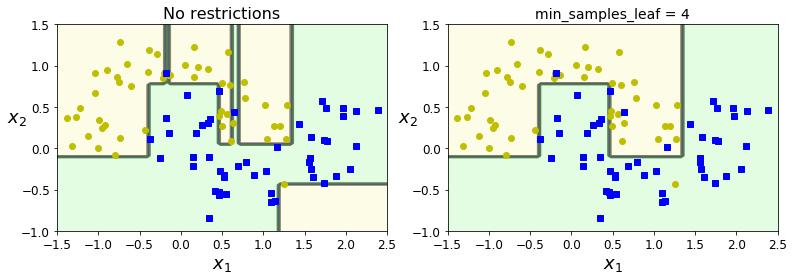

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42) #REGULARIZATION HERE
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

See more regularization options from sklearn website: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- min_samples_split
- min_samples_leaf
- min_weight_fraction_leaf
- max_leaf_nodes

Other algorithms work by first training the Decision Tree without
restrictions,  then  **pruning**  (deleting)  unnecessary  nodes.  A  node
whose  children  are  all  leaf  nodes  is  considered  unnecessary  if  the
purity improvement it provides is not statistically significant. 

# To sum up
- Decision trees tend to "over grow"
    -  Avoid splitting a partition if a resulting subpartition is too small, or if a terminal leaf  is  too  small (regularization). 
    - Let the tree full grow, then prune the tree to prevent overfitting (pruning).
- Do exploratory data analysis before you decide which regularization you would like to adopt.